In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import fasttext
import fasttext.util

In [3]:
ft = fasttext.load_model('cc.en.300.bin')

In [4]:
ft.get_dimension()

300

In [5]:
# fasttext.util.reduce_model(ft, 100)

In [6]:
# ft.get_dimension()

In [7]:
# from gensim.models.fasttext import FastText
# ft_model = FastText.load_fasttext_format('cc.en.300.bin', encoding='utf8')
# print(ft_model.wv['artificial'])

In [8]:
df = pd.read_excel("100K_designations.xlsx")

In [9]:
df.head()

,designation,company_function,lead_division,decision_making_power,designation_count,high,medium,low
0,owner,Ceo/founder/co-founder,General,High,7208411,7208411,0,0
1,manager,General Management,All,Medium,3346803,0,3346803,0
2,director,General Management,All,Medium,2750830,0,2750830,0
3,chief executive officer,Ceo/founder/co-founder,General,High,2194731,2194731,0,0
4,project manager,Technology,Project Management/business Analysis,Medium,1722573,0,1722573,0


In [10]:
df_designation =df[["designation"]]

In [11]:
df_designation.head()

,designation
0,owner
1,manager
2,director
3,chief executive officer
4,project manager


In [12]:
len(df_designation)

100000

In [13]:
def get_embeddings(word, ft):
    word = str(word)
    f = ft.get_word_vector(word)

    return f

In [14]:
df_designation['designation_embeddings'] = df_designation.apply(lambda x: get_embeddings(x["designation"], ft), axis = 1)

/var/folders/cb/5xtlk4kd1z9dj9xn83x7_2lc0000gn/T/ipykernel_13466/3111581121.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_designation['designation_embeddings'] = df_designation.apply(lambda x: get_embeddings(x["designation"], ft), axis = 1)


In [15]:
df_designation

,designation,designation_embeddings
0,owner,"[0.10359939, 0.012919815, -0.020326696, 0.0210..."
1,manager,"[0.04978625, 0.0021494515, 0.058040738, 0.0006..."
2,director,"[0.053093087, 0.0028660002, 0.03210948, -0.020..."
3,chief executive officer,"[0.010643294, -0.002743718, 0.0069506224, 0.05..."
4,project manager,"[-0.018011387, 0.013982448, 0.02371762, 0.0219..."
...,...,...
99995,aufnahmeleiter,"[0.06202216, -0.0016560154, 0.006459615, 0.039..."
99996,project manager and system engineer,"[-7.5632764e-05, -0.0002490571, 0.0048896256, ..."
99997,surveillante de nuit,"[-0.005686213, 0.003077648, 0.013325958, 0.035..."
99998,in-home expert,"[0.011924218, 0.025919154, -0.024609467, 0.074..."


In [16]:
df_designation.columns

Index(['designation', 'designation_embeddings'], dtype='object')

In [17]:
# df_ip.to_csv("embedding_v1.csv", index = False)

In [18]:
# !pip3 freeze > requirements.txt

In [19]:
feat_cols = ['feature'+str(i) for i in range(len(df_designation["designation_embeddings"][0]))]

In [20]:
df_designation[feat_cols] = pd.DataFrame(df_designation.designation_embeddings.tolist(), index= df_designation.index)

/Users/shubhamsunwalka/clustering_venv/lib/python3.9/site-packages/pandas/core/frame.py:3636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/Users/shubhamsunwalka/clustering_venv/lib/python3.9/site-packages/pandas/core/frame.py:3636: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[k1] = value[k2]


In [25]:
from sklearn.decomposition import PCA
# pca_breast = PCA(n_components=2)
# principalComponents_breast = pca_breast.fit_transform(x)

In [26]:
pca_breast = PCA(n_components=2)


In [ ]:
# from sklearn.preprocessing import StandardScaler
# x = df_ip.loc[:, feat_cols].values
# x = StandardScaler().fit_transform(x) # normalizing the features

In [21]:
x = df_designation[feat_cols]

In [22]:
np.mean(x),np.std(x)


(feature0     -0.002487
 feature1     -0.004182
 feature2     -0.006666
 feature3      0.029712
 feature4     -0.008790
                 ...   
 feature295   -0.001084
 feature296    0.001480
 feature297    0.030965
 feature298    0.009969
 feature299   -0.003307
 Length: 300, dtype: float32,
 feature0      0.034115
 feature1      0.038865
 feature2      0.038647
 feature3      0.033332
 feature4      0.036240
                 ...   
 feature295    0.036314
 feature296    0.035807
 feature297    0.064849
 feature298    0.034913
 feature299    0.033482
 Length: 300, dtype: float32)

In [ ]:
# df3 = pd.DataFrame(df_ip['designation_embeddings'].to_list(), columns=feat_cols)

In [27]:
principalComponents_breast = pca_breast.fit_transform(x)

In [28]:
principal_breast_Df = pd.DataFrame(data = principalComponents_breast
             , columns = ['principal component 1', 'principal component 2'])

In [29]:
principal_breast_Df

,principal component 1,principal component 2
0,0.017465,-0.105501
1,0.031086,-0.167336
2,0.009101,-0.113412
3,-0.059765,0.033029
4,-0.103331,0.003071
...,...,...
99995,-0.047785,0.027731
99996,-0.047866,-0.001484
99997,-0.062095,0.025881
99998,-0.062088,-0.010567


In [30]:
df_pca = pd.concat([df_designation,principal_breast_Df], axis = 1)

In [31]:
df_pca.head()

,designation,designation_embeddings,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,...,feature292,feature293,feature294,feature295,feature296,feature297,feature298,feature299,principal component 1,principal component 2
0,owner,"[0.10359939, 0.012919815, -0.020326696, 0.0210...",0.103599,0.012920,-0.020327,0.021071,0.025017,0.139867,0.045241,-0.035406,...,0.002596,0.110680,-0.040352,-0.141885,-0.041152,0.118572,-0.071148,0.088690,0.017465,-0.105501
1,manager,"[0.04978625, 0.0021494515, 0.058040738, 0.0006...",0.049786,0.002149,0.058041,0.000667,0.012303,0.092651,0.050417,-0.037550,...,0.008532,0.075187,0.003187,-0.026954,-0.031066,0.075162,0.018271,-0.002762,0.031086,-0.167336
2,director,"[0.053093087, 0.0028660002, 0.03210948, -0.020...",0.053093,0.002866,0.032109,-0.020286,-0.004184,0.046506,0.070234,0.001902,...,0.031772,0.054791,-0.043619,0.006205,-0.005137,0.058903,0.047262,0.026753,0.009101,-0.113412
3,chief executive officer,"[0.010643294, -0.002743718, 0.0069506224, 0.05...",0.010643,-0.002744,0.006951,0.059800,-0.008688,-0.022891,-0.005212,0.003306,...,-0.034283,-0.014590,0.012142,0.004158,-0.002489,0.041687,-0.000204,-0.031033,-0.059765,0.033029
4,project manager,"[-0.018011387, 0.013982448, 0.02371762, 0.0219...",-0.018011,0.013982,0.023718,0.021989,-0.003461,-0.007524,-0.023537,0.006761,...,-0.001556,-0.016821,0.011915,-0.005689,-0.009691,0.017902,0.013783,-0.003045,-0.103331,0.003071


In [32]:
df_pca_ip = df_pca[["principal component 1","principal component 2"]]

In [ ]:
# clustering find

1
2
3
4
5
6
7
8
9
10


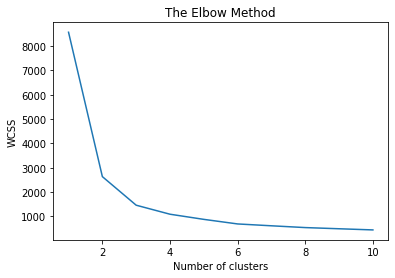

In [34]:

from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    print(i)
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=600,n_init=10,random_state=0)
    kmeans.fit(df_pca_ip)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('elbow.png')
plt.show()

In [35]:
# Let n_cluster be 6 and 8
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
prediction_val = kmeans.fit_predict(df_pca_ip.values)
#dropping the predicted value into the column name cluster
df_pca_ip['cluster']=prediction_val

/var/folders/cb/5xtlk4kd1z9dj9xn83x7_2lc0000gn/T/ipykernel_13466/2256177774.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pca_ip['cluster']=prediction_val


In [36]:
df_pca_ip

,principal component 1,principal component 2,cluster
0,0.017465,-0.105501,2
1,0.031086,-0.167336,2
2,0.009101,-0.113412,2
3,-0.059765,0.033029,2
4,-0.103331,0.003071,2
...,...,...,...
99995,-0.047785,0.027731,2
99996,-0.047866,-0.001484,2
99997,-0.062095,0.025881,2
99998,-0.062088,-0.010567,2


In [38]:
cent = kmeans.cluster_centers_
print(cent)

[[ 0.57172424 -0.05665265]
 [ 1.3881272  -0.34681913]
 [-0.0460304   0.00264122]
 [ 2.6354167   0.7049449 ]]


In [39]:
#clust_labels = prediction_val
kmeans = pd.DataFrame(prediction_val)
df_pca_ip.insert((df_pca_ip.shape[1]),'kmeans',kmeans)

In [40]:
df_pca_ip

,principal component 1,principal component 2,cluster,kmeans
0,0.017465,-0.105501,2,2
1,0.031086,-0.167336,2,2
2,0.009101,-0.113412,2,2
3,-0.059765,0.033029,2,2
4,-0.103331,0.003071,2,2
...,...,...,...,...
99995,-0.047785,0.027731,2,2
99996,-0.047866,-0.001484,2,2
99997,-0.062095,0.025881,2,2
99998,-0.062088,-0.010567,2,2


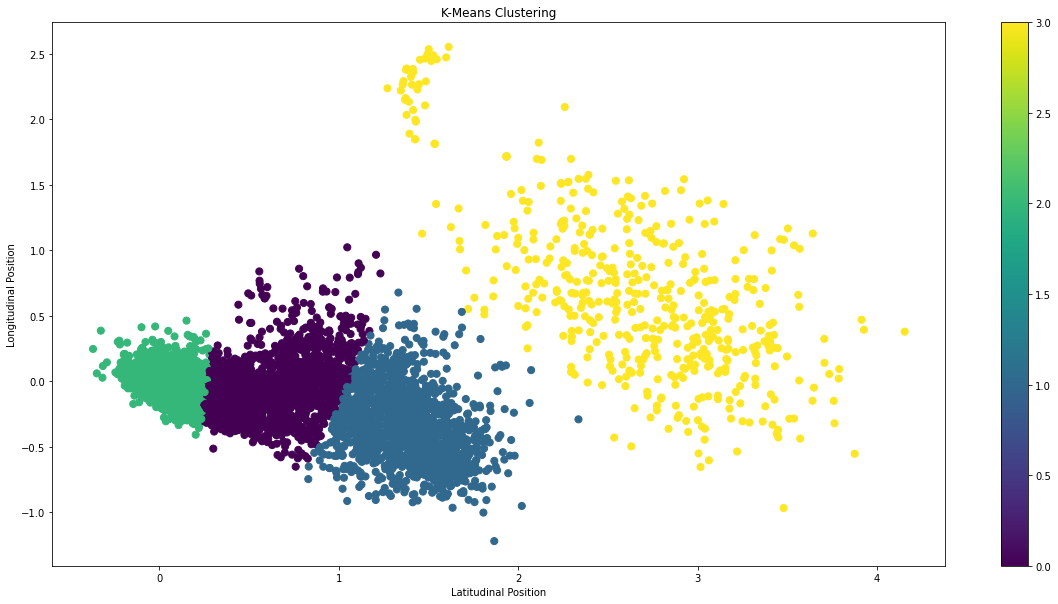

In [41]:
#Plot the clusters obtained using k means
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
scatter = ax.scatter(df_pca_ip['principal component 1'],df_pca_ip['principal component 2'],
                     c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('PCA1 Position')
ax.set_ylabel('PCA2 Position')
plt.colorbar(scatter)

In [45]:
final_df=pd.DataFrame({'designation':df['designation'].values,
                       'cluster':df_pca_ip["cluster"]})

In [46]:
final_df.head()

,designation,cluster
0,owner,2
1,manager,2
2,director,2
3,chief executive officer,2
4,project manager,2
